# 1. Importing libraries


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

# 2. Gathering Data

A.Importing Enhanced Twitter Archive

In [174]:
t_archive = pd.read_csv('twitter-archive-enhanced.csv')

B. Download The Tweet Image Predictions

In [175]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv' , mode ='wb') as file:
    file.write(response.content)

C.Getting Tweet Data From  Twitter API.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [176]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        print(type(line))
        tweet = json.loads(line)
        print(type(tweet))
        break

<class 'str'>
<class 'dict'>


In [177]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet ['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})
tweet_data = pd.DataFrame(df_list)
tweet_data.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [178]:
print(df_list[0])

{'tweet_id': 892420643555336193, 'retweet_count': 8853, 'favorite_count': 39467}


In [179]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet ['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count,
                       'user_count': user_count})
tweet_data  = pd.DataFrame(df_list) 
tweet_data .sample(10)

,favorite_count,retweet_count,tweet_id,user_count
246,0,15071,845459076796616705,3200891
2074,1189,758,670838202509447168,3201008
1408,2863,1345,699036661657767936,3200950
1298,3765,1133,707693576495472641,3200947
2087,700,255,670789397210615808,3201008
1710,1879,542,680494726643068929,3200953
448,95450,42228,819004803107983360,3200894
1877,2918,1335,675015141583413248,3201003
42,20771,3128,884162670584377345,3200890
2267,7148,2272,667509364010450944,3201016


In [180]:
tweet_data .to_csv('tweet_data.csv', index=False)

In [181]:
x = pd.read_csv('tweet_data.csv')
x.head()

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889


# 3.Assessing Data

A.Assesing Enhanced Twitter Archive Data

In [182]:
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [183]:
t_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
617,796387464403357696,NaN,NaN,2016-11-09 16:22:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snicku. He's having trouble reading be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796387464...,12,10,Snicku,None,None,None,None
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,None,None,pupper,None
1997,672591271085670400,NaN,NaN,2015-12-04 01:40:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591271...,8,10,None,None,None,None,None
525,809084759137812480,NaN,NaN,2016-12-14 17:16:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. You said you brushed your tee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/809084759...,11,10,Wallace,None,None,None,None
827,769212283578875904,NaN,NaN,2016-08-26 16:37:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is DonDon. He's way up but doesn't feel b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/769212283...,12,10,DonDon,None,None,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
1772,678278586130948096,NaN,NaN,2015-12-19 18:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another spooky pupper here. Most definitely fl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678278586...,10,10,None,None,None,pupper,None
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None
373,828376505180889089,NaN,NaN,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828376505...,13,10,Beebop,None,None,None,None
1830,676219687039057920,NaN,NaN,2015-12-14 01:58:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,None,None,None,None


In [184]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [185]:
t_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [186]:
t_archive[t_archive.rating_numerator <10 ].count()[0]

440

In [187]:
t_archive[t_archive.rating_numerator <10 ].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

In [188]:
t_archive.loc[(t_archive.tweet_id == 666337882303524864) , 'rating_numerator']

2333    9
Name: rating_numerator, dtype: int64

In [189]:
t_archive.loc[2333, 'text']

'This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL'

In [190]:
t_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [191]:
t_archive[t_archive.rating_denominator == 0 ].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [192]:
t_archive.loc[313, 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [193]:
t_archive[t_archive.rating_denominator != 10 ].count()[0]

23

In [194]:
t_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
Bailey            7
Daisy             7
Buddy             7
Toby              7
an                7
Oscar             6
Dave              6
Bella             6
Jax               6
Scout             6
Stanley           6
Koda              6
Rusty             6
Leo               6
Jack              6
Milo              6
Louis             5
               ... 
unacceptable      1
Terrenth          1
Geoff             1
Zooey             1
Donny             1
Tedrick           1
Zuzu              1
Joey              1
Rey               1
Lilli             1
DonDon            1
Norman            1
Karll             1
Strider           1
Pip               1
Poppy             1
Philippe          1
Dot               1
Izzy              1


B.Assesing The Tweet Image Predictions

In [195]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t' )
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [196]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
348,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,0.599454,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True
845,695095422348574720,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1,papillon,0.227784,True,Chihuahua,0.218128,True,Border_collie,0.093457,True
1700,817056546584727552,https://pbs.twimg.com/media/C1bEl4zVIAASj7_.jpg,1,kelpie,0.864415,True,French_bulldog,0.097456,True,German_shepherd,0.008526,True
1487,782021823840026624,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk_terrier,0.003913,True
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True
1107,723673163800948736,https://pbs.twimg.com/media/CgsA5eFWgAAu0qn.jpg,1,golden_retriever,0.839390,True,Labrador_retriever,0.065706,True,hand_blower,0.012941,False
1422,772114945936949249,https://pbs.twimg.com/media/Crcacf9WgAEcrMh.jpg,1,Chihuahua,0.803293,True,toy_terrier,0.052980,True,Italian_greyhound,0.037239,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
429,674265582246694913,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False


In [197]:
image_predictions.loc[1312, 'jpg_url'] #identified as bathtup.

'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg'

In [198]:
from IPython.display import Image
Image(url ='https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg')

In [199]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


C.Assesing The Tweet Tata Trom Twitter API

In [200]:
tweet_data.head()

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889


In [201]:
tweet_data.sample(10)

,favorite_count,retweet_count,tweet_id,user_count
2337,81,16,666102155909144576,3201018
988,3047,1067,748705597323898880,3200943
2165,390,134,669359674819481600,3201012
453,12127,2873,818536468981415936,3200894
173,16524,3154,858107933456039936,3200891
841,2872,438,766714921925144576,3200906
1458,2918,885,695051054296211456,3200950
70,19763,4319,878776093423087618,3200892
719,0,6533,783347506784731136,3200901
621,9469,2703,796080075804475393,3200900


In [202]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


# Tidiness

T1. For dog stage, there are some rows with multiple dog stages.

T2. all data is related but divided into 3 separate dataframes.


 # Quality

A) Enhanced Twitter Archive

1.there are 181 retweets as indicated by retweeted status_id.

2.Name column have None instead of NaN and too many unvalid values.

3.invalid tweet_id data type(integer instead of string).

4.invalid timestamp data type(string not datetine).

5.440 rating numerators less than 10 .

6.raw 313 has no denominators.

7.23 rating denominators no equal 10.

B) Tweet Image Predictions.

1.underscores are used in multi-world names in columns p1,p2&p3 instead of spaces.

2 some P names started with an uppercase letter while other started with lowercase

c) Tweet Data From Twitter Api

1.missing entires (only 2354 entires instead of 2356)


# 4.Cleaning Data

A. creating dataframe copies

In [236]:
clean_t_archive = t_archive.copy()
clean_image_predictions = image_predictions.copy()
clean_tweet_data = tweet_data.copy()

In [237]:
clean_t_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [238]:
clean_image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [239]:
clean_tweet_data.head(1)

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889


B.Cleaning Tidiness Issues.

T1. For dog stage, there are some rows with multiple dog stages

 Define

 
 clean data from some rows with multiple dog stages.

code

In [240]:
# handle none
clean_t_archive.doggo.replace('None', '', inplace=True)
clean_t_archive.floofer.replace('None', '', inplace=True)
clean_t_archive.pupper.replace('None', '', inplace=True)
clean_t_archive.puppo.replace('None', '', inplace=True)

In [241]:
# merge into column
clean_t_archive['dog_stage'] = clean_t_archive.doggo + clean_t_archive.floofer + clean_t_archive.pupper 

In [242]:
# handle multiple stages
clean_t_archive.loc[clean_t_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_t_archive.loc[clean_t_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_t_archive.loc[clean_t_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [243]:
# handle missing values
clean_t_archive.loc[clean_t_archive.dog_stage == '', 'dog_stage'] = np.nan

In [244]:
clean_t_archive.dog_stage.value_counts(dropna = False)

NaN               2005
pupper             245
doggo               84
doggo, pupper       12
floofer              9
doggo, floofer       1
Name: dog_stage, dtype: int64

test

In [245]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage                     35

T2. All data is related but divided into 3 separate dataframes.

Define

Merge all dataframes into 1 based on tweet_id

code

In [246]:
clean_t_archive = pd.merge(clean_t_archive, clean_tweet_data, on= 'tweet_id', how= 'left')
clean_t_archive = pd.merge(clean_t_archive, clean_image_predictions, on= 'tweet_id', how= 'left')

test

In [247]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage                     35

C.Cleaning Quality Issues.

AQ1.There are 181 retweets as indicated by retweeted status_id.

Define

Delete rows that represent retweets and all the relatted columns.

code

In [248]:
clean_t_archive = clean_t_archive[clean_t_archive.retweeted_status_id.isnull()]
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dog_stage                     320 non-

In [249]:
clean_t_archive = clean_t_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

test

In [250]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dog_stage                320 non-null object
favorite_count           2175 non-null float64
retweet_count            2175 non-null float64
user_count               2175 non-null float64
jpg_url                  1994 non-null object
img_num               

AQ2.Name column have None instead of NaN and too many unvalid values.

Define

Replace 'None' with np.name in t_archive name column.

Remove any rows with invalid names which starts with lower letter.

code

In [251]:
clean_t_archive[~clean_t_archive.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [252]:
clean_t_archive.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

test

In [253]:
clean_t_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [254]:
clean_t_archive.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Sadie          8
Winston        8
Toby           7
Daisy          7
Koda           6
Bella          6
Stanley        6
Oscar          6
Bo             6
Jax            6
Bailey         6
Milo           5
Leo            5
Rusty          5
Bentley        5
Chester        5
Dave           5
Buddy          5
Louis          5
Scout          5
Bear           4
Finn           4
Dexter         4
              ..
Kollin         1
Hanz           1
Miguel         1
Brandy         1
Cermet         1
Gilbert        1
Oddie          1
Georgie        1
Lilli          1
Banjo          1
Christoper     1
Pipsy          1
Ron            1
Mauve          1
Ben            1
Siba           1
Lilah          1
Joey           1
DonDon         1
Karma          1
Norman         1
Karll          1
Strider        1
Pip            1
Philippe       1
Dot            1
Carly          1
Rey           

In [255]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dog_stage                320 non-null object
favorite_count           2175 non-null float64
retweet_count            2175 non-null float64
user_count               2175 non-null float64
jpg_url                  1994 non-null object
img_num               

AQ3. invalid tweet_id data type(integer instead of string).

Define

correct invalid data type by converting tweet_id to string.

code

In [256]:
clean_t_archive.tweet_id = clean_t_archive.tweet_id.astype(str)

test

In [257]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dog_stage                320 non-null object
favorite_count           2175 non-null float64
retweet_count            2175 non-null float64
user_count               2175 non-null float64
jpg_url                  1994 non-null object
img_num              

AQ4. invalid timestamp data type(string not datetime).

Define

correct invalid data type by converting timestamp to datamine

code

In [258]:
clean_t_archive.timestamp = pd.to_datetime(clean_t_archive.timestamp)

test

In [259]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dog_stage                320 non-null object
favorite_count           2175 non-null float64
retweet_count            2175 non-null float64
user_count               2175 non-null float64
jpg_url                  1994 non-null object
img_num      

BQ1.underscores are used in multi-world names in columns p1,p2&p3 instead of spaces.


Define

convert underscores to spaces

code

In [260]:
clean_t_archive.p1 = clean_t_archive.p1.str.replace('_',' ')
clean_t_archive.p2 = clean_t_archive.p2.str.replace('_',' ')
clean_t_archive.p3 = clean_t_archive.p3.str.replace('_',' ')

test

In [261]:
clean_t_archive.p1.head(10)

0                      orange
1                   Chihuahua
2                   Chihuahua
3                 paper towel
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: p1, dtype: object

In [262]:
clean_t_archive.p2.head(10)

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
5         Irish terrier
6         Border collie
7            Eskimo dog
8          Irish setter
9              Cardigan
Name: p2, dtype: object

In [263]:
clean_t_archive.p3.head(10)

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
5                Indian elephant
6                      ice lolly
7                       Pembroke
8       Chesapeake Bay retriever
9                      Chihuahua
Name: p3, dtype: object

BQ.2 some P names started with an uppercase letter while other started with lowercase

Define

convert lowercase letters to uppercase

code

In [264]:
clean_t_archive.p1 = clean_t_archive.p1.str.title()
clean_t_archive.p2 = clean_t_archive.p2.str.title()
clean_t_archive.p3 = clean_t_archive.p3.str.title()

test

In [265]:
clean_t_archive.p1.head(20)

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper Towel
4                       Basset
5     Chesapeake Bay Retriever
6                  Appenzeller
7                   Pomeranian
8                Irish Terrier
9                     Pembroke
10                     Samoyed
11              French Bulldog
12                    Pembroke
13              French Bulldog
14            Golden Retriever
15                     Whippet
16            Golden Retriever
17            Golden Retriever
18              Siberian Husky
20              French Bulldog
Name: p1, dtype: object

CQ1.missing entires (only 2354 entires instead of 2356)


Define

delete rowes without retweet_count entiers

code

delete in previous steps while cleaning other issues

test

In [266]:
sum(clean_t_archive.retweet_count.isnull())

0

# Storing Data

In [267]:
clean_t_archive.to_csv('twitter_archive_master.csv')

# Data Analysis And Visualizations

A. the percentage different between dog stage

In [268]:
stage_df = clean_t_archive.dog_stage.value_counts()
stage_df

pupper            224
doggo              76
doggo, pupper      10
floofer             9
doggo, floofer      1
Name: dog_stage, dtype: int64

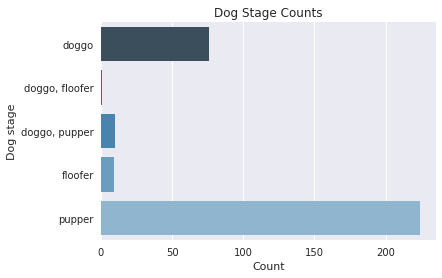

In [269]:
data = clean_t_archive.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Dog stage', title='Dog Stage Counts')
plt.show()

insights

1.pupper has the highest percentage

2.doggo, floofer has the lowest percentage

#B.Relationship between Retweet count and favorite count

Text(0,0.5,'favorite count')

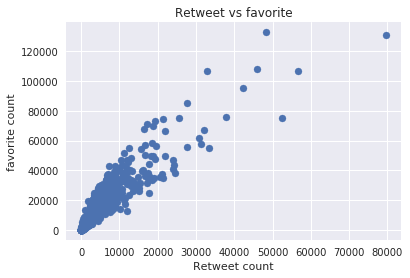

In [270]:
plt.scatter(clean_t_archive.retweet_count,clean_t_archive.favorite_count)
plt.title('Retweet vs favorite')
plt.xlabel('Retweet count')
plt.ylabel('favorite count')

insights
it appears that there is alinear relationship between both parameters.